# Task 2: Clustering

In [1]:
#Used for displaying plots below the cell
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats.stats import pearsonr

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

In [2]:
cust_df = pd.read_csv('customer_features.csv', sep='\t', index_col=0)

In [3]:
cust_df

,I,Iu,Imax,AvgRevenueMonth,AvgCostsMonth,AvgSessionsMonth,Eweekday,Eproduct
CustomerID,,,,,,,,
12346.0,74215,1,74215,77183.600000,77183.60,1.000000,0.000000,0.000000
12347.0,2458,103,676,718.333333,0.00,1.166667,1.448816,6.015601
12348.0,2341,22,1254,449.310000,0.00,1.000000,2.000000,4.233442
12349.0,631,73,631,1757.550000,0.00,1.000000,0.000000,5.802215
12350.0,197,17,197,334.400000,0.00,1.000000,0.000000,3.977269
...,...,...,...,...,...,...,...,...
18280.0,45,10,45,180.600000,0.00,1.000000,0.000000,3.207542
18281.0,54,7,54,80.820000,0.00,1.000000,0.000000,2.462523
18282.0,103,12,75,89.025000,1.45,1.000000,1.000000,2.660805


## Normalization  
Z-scaler

In [4]:
scaler = StandardScaler()
scaler.fit(cust_df.values)
X = scaler.transform(cust_df.values)

## K-Means

Let's use the Knee method to find the best k.

In [5]:
sse_list = list()
max_k = 40
for k in range(2, max_k + 1): #Starting from k=2 to k=40
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

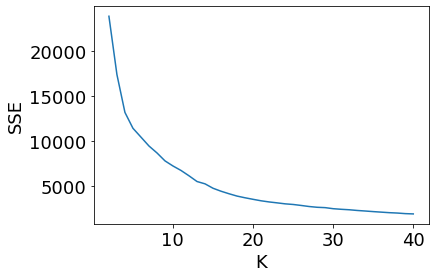

In [6]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=18)
plt.xlabel('K', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

It seems that around K=10 ± 5 we get diminishing returns.

In [7]:
kmeans = KMeans(n_clusters=10, n_init=10, max_iter=100)
kmeans.fit(X)
centers = scaler.inverse_transform(kmeans.cluster_centers_)

In [8]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 809, 1: 500, 2: 2, 3: 1651, 4: 264, 5: 1, 6: 21, 7: 3, 8: 1, 9: 1087}

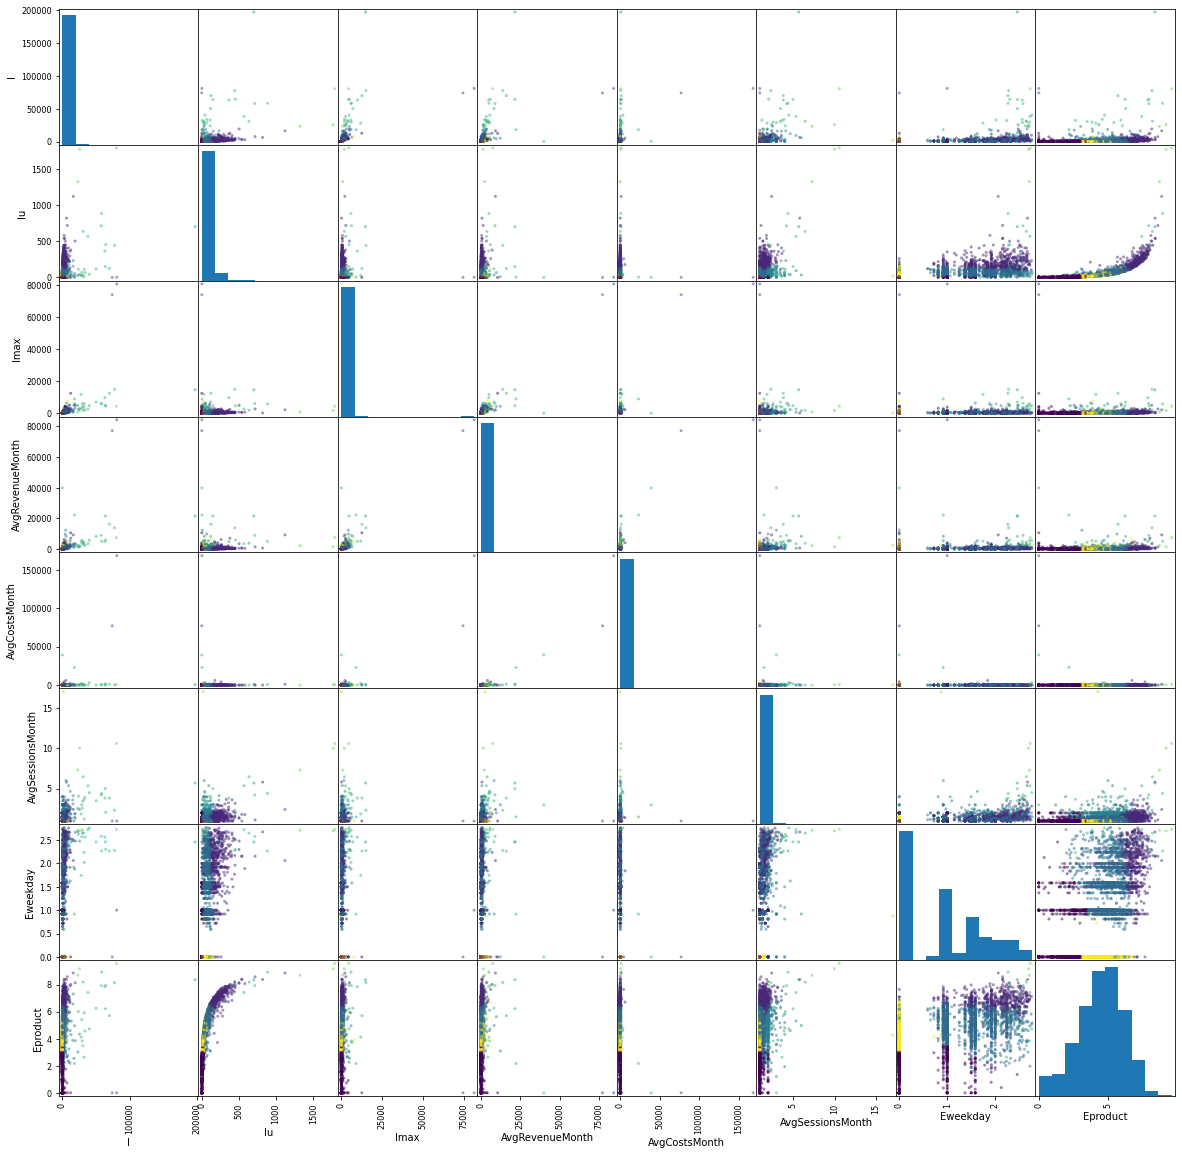

In [9]:
pd.plotting.scatter_matrix(cust_df, c=kmeans.labels_, figsize=(20,20))
plt.show()

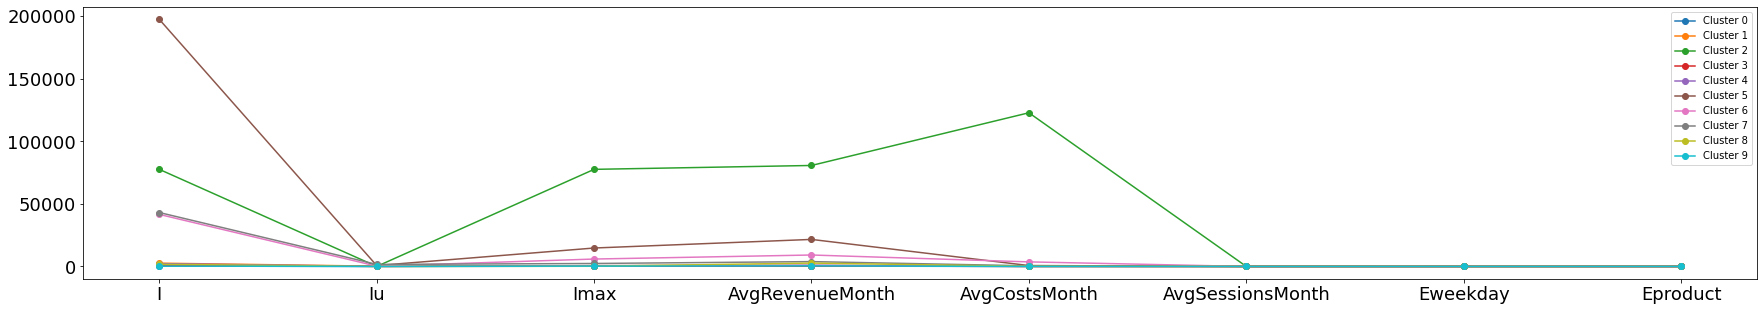

In [10]:
plt.figure(figsize=(30, 5))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xticks(range(0, len(cust_df.columns)), cust_df.columns, fontsize=18)
plt.legend(fontsize=10)
plt.show()


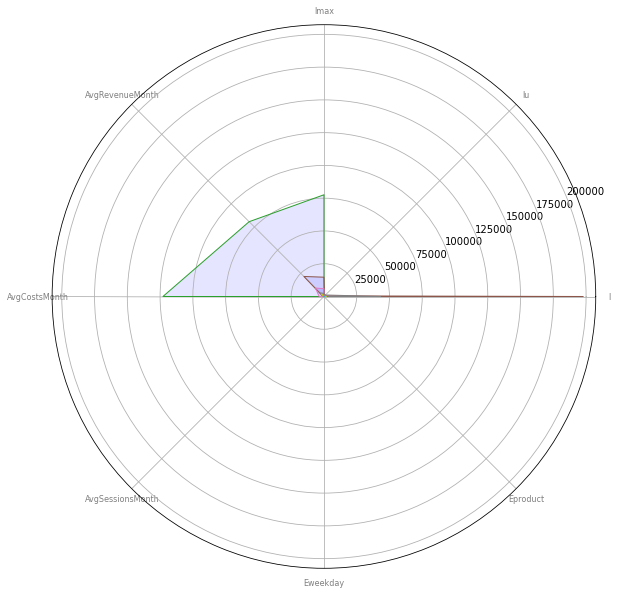

In [11]:
# number of variable
N = len(cust_df.columns)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)

# Initialise the spider plot
plt.figure(figsize=(10, 10))
ax = plt.subplot(polar=True)

for i in range(0, len(centers)):
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    values = centers[i].tolist()
    values += values[:1]
    angles += angles[:1]
    
# Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], cust_df.columns, color='grey', size=8) 
# Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
 # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

### PCA analysis

In [1]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X) #We need the normalised data
print(pca.explained_variance_ratio_) #Variance explained by the components

NameError: name 'PCA' is not defined

We are retaining approximately 86% of the variance.  
Let's apply the elbow method to the PCA transformed data.

In [13]:
sse_list = list()
max_k = 40
for k in range(2, max_k + 1): #Starting from k=2 to k=40
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_pca)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

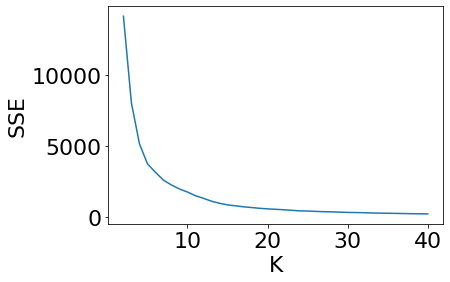

In [14]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

The optimal value is still k=10.

In [15]:
pca_kmeans = KMeans(n_clusters=10, n_init=10, max_iter=100)
pca_kmeans.fit(X_pca)

KMeans(max_iter=100, n_clusters=10)

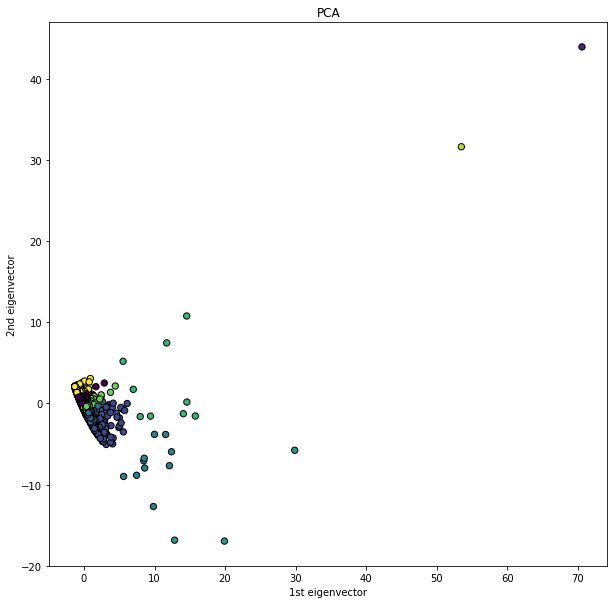

In [16]:
plt.figure(figsize=(10, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pca_kmeans.labels_, edgecolor='k', s=40)
plt.title("PCA")
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.show()

The clusters are well separated.  
We now have a new categorical feature to help us analyse the pre-PCA dataset.